In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import f1_score
import numpy as np
from sklearn.metrics import f1_score

traindata = pd.read_csv("train_values.csv",sep=',')
traindata.columns[traindata.isna().any()]
data=traindata
data.drop(['building_id'], axis=1, inplace=True)
trainlabels = pd.read_csv("train_labels.csv",sep=',')
trainout=trainlabels
trainout.drop(['building_id'], axis=1, inplace=True)
testvalues = pd.read_csv("test_values.csv",sep=',')
testdata=testvalues
testdata.drop(['building_id'], axis=1, inplace=True)

In [83]:
cleanup_letters = {"land_surface_condition": {"n": 1, "o": 2, "t":3},
                "foundation_type": {"h": 1, "i": 2, "r": 3, "u": 4, "w": 5},               
                "roof_type": {"n": 1, "q": 2, "x": 3},
                "ground_floor_type": {"f": 1, "m": 2, "v": 3, "x": 4, "z": 5},
                "other_floor_type": {"j": 1, "q": 2, "s": 3, "x": 4},
                "position": {"j": 1, "o": 2, "s": 3, "t": 4},
                "plan_configuration": {"a": 1, "c": 2, "d": 3, "f": 4, "m": 5, "n": 6, "o": 7, "q": 8, "s": 9, "u":10},
                "legal_ownership_status": {"a": 1, "r": 2, "v": 3, "w": 4}             
               }
data.replace(cleanup_letters, inplace=True)
testdata.replace(cleanup_letters, inplace=True)
a = list(data)
del a[-1]
x = data[a].values
y = trainout['damage_grade'].values

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [85]:
#logistic regression

In [86]:
import numpy as np
model_1 = LogisticRegression()
model_1.fit(X_train,y_train)
y_pred1=model_1.predict(X_test)
f1_model1=f1_score(y_test,y_pred1,average='micro',labels=np.unique(y_pred1))
print("F1 score Model 1 : ",f1_model1)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred1))
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred1, normalize=True, sample_weight=None)
print(acc)
y_pr1=model_1.predict_proba(X_test)
from sklearn.metrics import log_loss
ll=sklearn.metrics.log_loss(y_test, y_pr1, normalize=True)
print(ll)
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
 lb = preprocessing.LabelBinarizer()
 lb.fit(y_test)
 y_test = lb.transform(y_test)
 y_pred = lb.transform(y_pred)
 return roc_auc_score(y_test, y_pred, average=average)
from sklearn.metrics import roc_auc_score
roc=multiclass_roc_auc_score(y_test, y_pred1, average="weighted")
print(roc)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


F1 score Model 1 :  0.5736651253813242
              precision    recall  f1-score   support

           1       0.60      0.19      0.29      5170
           2       0.58      0.94      0.72     29487
           3       0.49      0.06      0.11     17464

   micro avg       0.57      0.57      0.57     52121
   macro avg       0.56      0.40      0.37     52121
weighted avg       0.55      0.57      0.47     52121

0.5736651253813242
0.8138411310003133
0.5254423276451331


In [87]:
model_3 = DecisionTreeClassifier()
model_3.fit(X_train,y_train)
y_pred3=model_3.predict(X_test)
f1_model3=f1_score(y_test,y_pred3,average='micro',labels=np.unique(y_pred3))
print("F1 score Model 3 : ",f1_model3)
print(metrics.classification_report(y_test, y_pred3))
import sklearn
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred3, normalize=True, sample_weight=None)
print(acc)
y_pr3=model_3.predict_proba(X_test)
from sklearn.metrics import log_loss
ll=sklearn.metrics.log_loss(y_test, y_pr3, normalize=True)
print(ll)
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
 lb = preprocessing.LabelBinarizer()
 lb.fit(y_test)
 y_test = lb.transform(y_test)
 y_pred = lb.transform(y_pred)
 return roc_auc_score(y_test, y_pred, average=average)
from sklearn.metrics import roc_auc_score
roc=multiclass_roc_auc_score(y_test, y_pred3, average="weighted")
print(roc)

F1 score Model 3 :  0.65520615490877
              precision    recall  f1-score   support

           1       0.49      0.50      0.49      5170
           2       0.71      0.70      0.71     29487
           3       0.62      0.62      0.62     17464

   micro avg       0.66      0.66      0.66     52121
   macro avg       0.60      0.61      0.61     52121
weighted avg       0.66      0.66      0.66     52121

0.65520615490877
11.595246964082454
0.6855491996274105


In [88]:
from sklearn.neighbors import KNeighborsClassifier
model_6 = KNeighborsClassifier(n_neighbors=2000)
model_6.fit(X_train,y_train)
y_pred6=model_6.predict(X_test)
f1_model6=f1_score(y_test,y_pred6,average='micro',labels=np.unique(y_pred6))
print("F1 score Model 6 : ",f1_model6)
print(metrics.classification_report(y_test, y_pred6))
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred6, normalize=True, sample_weight=None)
print(acc)
y_pr6=model_6.predict_proba(X_test)
from sklearn.metrics import log_loss
ll=sklearn.metrics.log_loss(y_test, y_pr6, normalize=True)
print(ll)
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
 lb = preprocessing.LabelBinarizer()
 lb.fit(y_test)
 y_test = lb.transform(y_test)
 y_pred = lb.transform(y_pred)
 return roc_auc_score(y_test, y_pred, average=average)
from sklearn.metrics import roc_auc_score
roc=multiclass_roc_auc_score(y_test, y_pred6, average="weighted")
print(roc)

F1 score Model 6 :  0.5951833010335918


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      5170
           2       0.57      1.00      0.72     29487
           3       0.39      0.00      0.00     17464

   micro avg       0.57      0.57      0.57     52121
   macro avg       0.32      0.33      0.24     52121
weighted avg       0.45      0.57      0.41     52121

0.5656645114253372
0.9071036125981874
0.4999959365219742


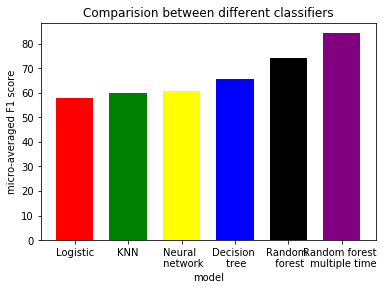

In [39]:
import matplotlib.pyplot as plt
left_values = [1,2,3,4,5,6]
KNN=59.83
LOG=57.83
ANN=60.87
DEC=65.50
RAN=74.04
RANM=84.28
heights = [LOG,KNN,ANN,DEC,RAN,RANM]
labels = ['Logistic','KNN','Neural \n network','Decision \n tree','Random \n forest','Random forest \n multiple time']
plt.bar(left_values, heights, tick_label = labels, width = 0.7, color = ['red', 'green','yellow','blue','black','purple'])
plt.xlabel('model')
plt.ylabel('micro-averaged F1 score')
plt.title('Comparision between different classifiers')
plt.show()

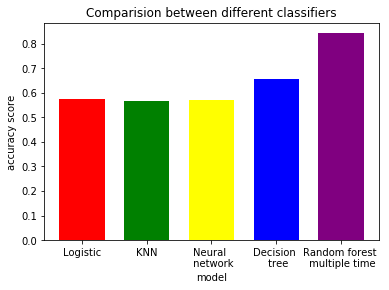

In [92]:
import matplotlib.pyplot as plt
left_values = [1,2,3,4,5]
KNN=0.5656645114253372
LOG=0.5736651253813242
ANN=0.5694633640950865
DEC=0.65614627501391
RANM=0.842827267320274
heights = [LOG,KNN,ANN,DEC,RANM]
labels = ['Logistic','KNN','Neural \n network','Decision \n tree','Random forest \n multiple time']
plt.bar(left_values, heights, tick_label = labels, width = 0.7, color = ['red', 'green','yellow','blue','purple'])
plt.xlabel('model')
plt.ylabel('accuracy score')
plt.title('Comparision between different classifiers')
plt.show()

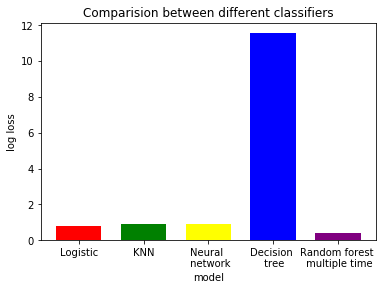

In [94]:
import matplotlib.pyplot as plt
left_values = [1,2,3,4,5]
KNN=0.9071036125981874
LOG=0.8138411310003133
ANN=0.9114675386381845
DEC=11.559306713656426
RANM=0.3963479339233164
heights = [LOG,KNN,ANN,DEC,RANM]
labels = ['Logistic','KNN','Neural \n network','Decision \n tree','Random forest \n multiple time']
plt.bar(left_values, heights, tick_label = labels, width = 0.7, color = ['red', 'green','yellow','blue','purple'])
plt.xlabel('model')
plt.ylabel('log loss')
plt.title('Comparision between different classifiers')
plt.show()

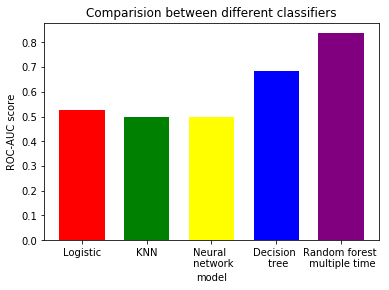

In [96]:
import matplotlib.pyplot as plt
left_values = [1,2,3,4,5]
KNN=0.4999959365219742
LOG=0.5254423276451331
ANN=0.5
DEC=0.6855491996274105
RANM=0.8371901113284672
heights = [LOG,KNN,ANN,DEC,RANM]
labels = ['Logistic','KNN','Neural \n network','Decision \n tree','Random forest \n multiple time']
plt.bar(left_values, heights, tick_label = labels, width = 0.7, color = ['red', 'green','yellow','blue','purple'])
plt.xlabel('model')
plt.ylabel('ROC-AUC score')
plt.title('Comparision between different classifiers')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, predict)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

In [13]:
model_4 = RandomForestClassifier(n_estimators=50)
model_4.fit(X_train,y_train)
y_pred4=model_4.predict(X_test)
f1_model4=f1_score(y_test,y_pred4,average='micro',labels=np.unique(y_pred4))
print("F1 score Model 4 : ",f1_model4)
print(metrics.classification_report(y_test, y_pred4))

F1 score Model 4 :  0.7163715201166516
              precision    recall  f1-score   support

           1       0.64      0.48      0.55      4979
           2       0.72      0.82      0.77     29703
           3       0.72      0.60      0.65     17439

   micro avg       0.72      0.72      0.72     52121
   macro avg       0.69      0.63      0.66     52121
weighted avg       0.71      0.72      0.71     52121



In [ ]:
model_2 = SVC()
model_2.fit(X_train,y_train)
y_pred2=model_2.predict(X_test)
f1_model2=f1_score(y_test,y_pred2,average='micro',labels=np.unique(y_pred2))
print("F1 score Model 2 : ",f1_model2)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
model_5 = GradientBoostingClassifier()
model_5.fit(X_train,y_train)
y_pred5=model_5.predict(X_test)
f1_model5=f1_score(y_test,y_pred5,average='micro',labels=np.unique(y_pred5))
print("F1 score Model 5 : ",f1_model5)

In [4]:
#svc